In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16})

In [2]:
import utils

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [371]:
X_raw, y_raw = utils.load_data()
X_raw, y_raw = utils.resample_data(X_raw, y_raw, xmin=0.3, xmax=0.5, npts=1000, k=1)

Text(0.5, 1.0, 'the data')

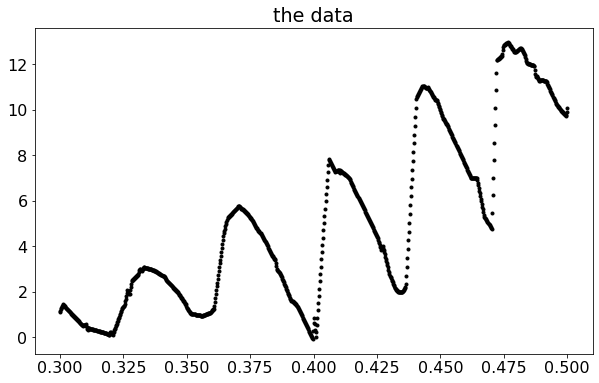

In [372]:
plt.figure(figsize=(10,6))
plt.plot(X_raw, y_raw, 'k.')
plt.title('the data')

In [373]:
scaleX = False
scaleY = False
scaler_func_name = "minmax"
# scaler_func_name = "standard"
if scaleX:
    X_scaled, X_scaler = utils.scale_1d_data(X_raw, scaler_func_name=scaler_func_name)
    X = X_scaled.copy()
else:
    X = X_raw.copy()
if scaleY:
    y_scaled, y_scaler = utils.scale_1d_data(y_raw, scaler_func_name=scaler_func_name)
    Y = y_scaled.copy()
else:
    y = y_raw.copy()

Text(0.5, 1.0, 'the data')

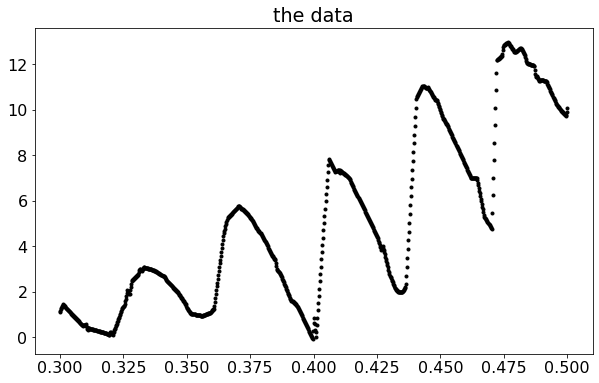

In [374]:
plt.figure(figsize=(10,6))
plt.plot(X, y, 'k.')
plt.title('the data')

In [388]:
model = Sequential()
model.add(Dense(32, input_dim=1, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 32)                64        
_________________________________________________________________
dense_102 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_103 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_104 (Dense)            (None, 256)               33024     
_________________________________________________________________
dense_105 (Dense)            (None, 1)                 257       
Total params: 43,777
Trainable params: 43,777
Non-trainable params: 0
_________________________________________________________________


In [389]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)

In [390]:
model.compile(loss='mse', optimizer=opt)

In [391]:
# mask = (X >= 0.4) & (X <= 0.5)
mask = (X >= 0.3) & (X <= 0.5)
# mask = (X >= X[0]) & (X <= X[-1])

In [392]:
history = model.fit(X[mask], y[mask], epochs=100)

Train on 1000 samples
Epoch 1/10000
1000/1000 [==============================] - 0s 251us/sample - loss: 32.4871
Epoch 2/10000
1000/1000 [==============================] - 0s 36us/sample - loss: 13.6345
Epoch 3/10000
1000/1000 [==============================] - 0s 38us/sample - loss: 12.5857
Epoch 4/10000
1000/1000 [==============================] - 0s 35us/sample - loss: 12.4609
Epoch 5/10000
1000/1000 [==============================] - 0s 34us/sample - loss: 11.8052
Epoch 6/10000
1000/1000 [==============================] - 0s 35us/sample - loss: 11.1138
Epoch 7/10000
1000/1000 [==============================] - 0s 34us/sample - loss: 10.0149
Epoch 8/10000
1000/1000 [==============================] - 0s 32us/sample - loss: 8.1549
Epoch 9/10000
1000/1000 [==============================] - 0s 35us/sample - loss: 5.9536
Epoch 10/10000
1000/1000 [==============================] - 0s 34us/sample - loss: 4.8475
Epoch 11/10000
1000/1000 [==============================] - 0s 34us/sample - lo

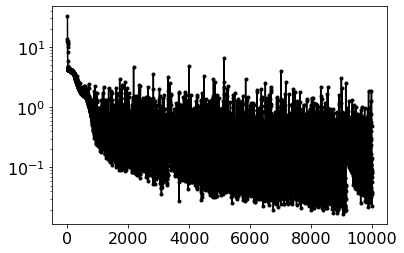

In [393]:
plt.figure()
plt.plot(history.history['loss'], 'k.-')
plt.yscale('log')

In [394]:
yhat = model.predict(X)

Text(0.5, 1.0, 'the data')

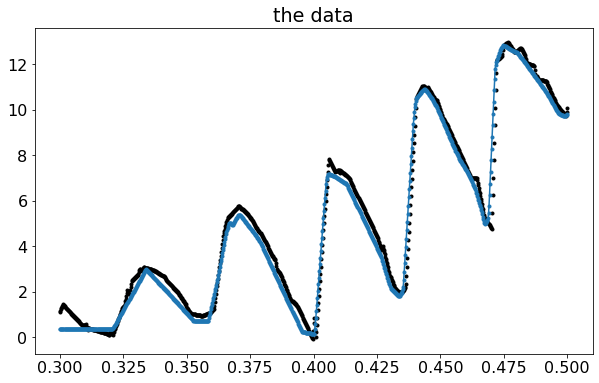

In [379]:
plt.figure(figsize=(10,6))
plt.plot(X, y, 'k.')
plt.plot(X, yhat, 'C0.-')
plt.title('the data')

Text(0.5, 1.0, 'the data')

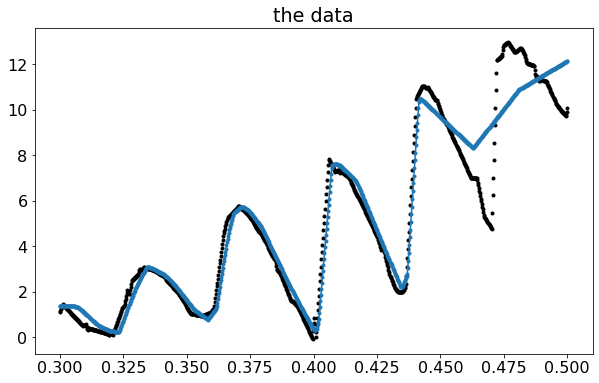

In [387]:
plt.figure(figsize=(10,6))
plt.plot(X, y, 'k.')
plt.plot(X, yhat, 'C0.-')
plt.title('the data')

Text(0.5, 1.0, 'the data')

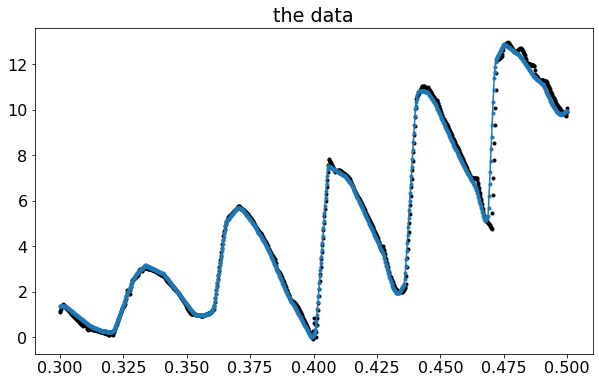

In [395]:
plt.figure(figsize=(10,6))
plt.plot(X, y, 'k.')
plt.plot(X, yhat, 'C0.-')
plt.title('the data')